# Chapter 1

An introduction to the Jupyter Notebook and some practice with probability ideas from Chapter 1.
## 1.1 Probability
### 1.1.1 Moments of Measured Data

The Jupyter Notebook has two primary types of cells "Markdown" cells for text (like this one) and "Code" cells for running python code. The cell below this one is a code cell that loads the plotting functions into the `plt` namespace and loads several functions from the `numpy` library. The last line requests that all plots show up inline in the notebook (instead of in other windows or as files on your computer).

In [1]:
import matplotlib.pyplot as plt
from numpy import array, sin, sqrt, dot, outer
%matplotlib inline

Arrays of data, and their average and sum in Python. We use some definitions from `numpy`. Notice the way these operators can be applied to arrays (with the "." operator).

In [2]:
x = array([1,2,3])

In [3]:
x.sum()

6

In [4]:
x.mean()

2.0

The formal definition (and to make sure we match with the book) is to take the sum and divide by the number of items in the sample:

In [5]:
x.sum()/len(x)

2.0

#### Higher order moments
Operate on the sample, python does this element-by-element, then do the same thing as above. You may be surprised that to raise a power is "**" instead of "^". This is a difference between python and other languages, just something to keep in mind!

In [6]:
x**2

array([1, 4, 9])

In [7]:
(x**2).sum() # Note the parenthesis!

14

In [8]:
(x**2).sum()/len(x)

4.666666666666667

In [9]:
(x**2).mean()

4.666666666666667

### It works for functions too
`sin(x)` will find the `sin` of each element in the array `x`:

In [10]:
sin(x)

array([0.84147098, 0.90929743, 0.14112001])

In [11]:
sin(x).sum()/len(x)

0.6306294732311485

In [12]:
sin(x).mean()

0.6306294732311485

#### Variance

In [13]:
x.var()  # Variance

0.6666666666666666

In [14]:
x.std()  # Standard Deviation

0.816496580927726

We can test if two quanties are equal with the `==` operator. Not the same as `=` since the `=` is an assignment operator. This will trip you up if you are new to programming, but you'll get over it.

In [15]:
x.std()**2 == x.var()  # Related by a square root

True

### Example 1.1

In [16]:
x_m = array([9,5,25,23,10,22,8,8,21,20])

In [17]:
x_m.mean()

15.1

In [18]:
(x_m**2).sum()/len(x_m)

281.3

In [19]:
sqrt(281.3 - (15.1)**2)

7.300000000000002

In [20]:
x_m.std()

7.3

Close enough!

### 1.1.2 Probability

### Example 1.2
This is an illustration of how to implement the histogram from Example 1.2 in the text. Note the use of setting the number of bins. The `hist` command will pick for you, and you should try other values to see the impact. There is no one correct value, but the too many bins doesn't illustrate clusters of data, and too-few bins tends to oversimplify the data.

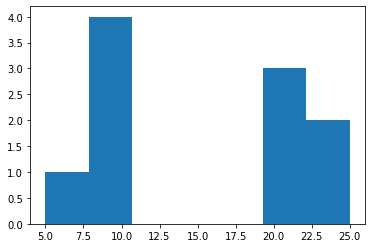

In [21]:
n, bins, patches = plt.hist(x_m,bins=7)

The hist function has several possible arguments, we use bins=7 to match the example.

In [28]:
# an array of the counts in each bin:
n

array([1., 4., 0., 0., 0., 3., 2.])

In [29]:
n/10.0*array([6,9,12,15,18,21,24])  # counts times each bin-center value

array([0.6, 3.6, 0. , 0. , 0. , 6.3, 4.8])

In [30]:
# sum of the last cell should be the mean:
sum(_)

15.3

In [32]:
n/10.0*array([6,9,12,15,18,21,24])**2  # counts times each bin-center value

array([  3.6,  32.4,   0. ,   0. ,   0. , 132.3, 115.2])

In [33]:
# sum of the last cell should be the second moment:
sum(_)

283.5

Both of these results are close to the previous value, but not exact. Remember, the historgram is a representation of the data and the agreement will improve for larger data sets.

## 1.2 Linear Algebra
### 1.2.1 Vectors and Basis sets
We'll use the qutip library later, even though this is all just linear algebra. For now, try using standard-python for vector math:

In [27]:
rvec = array([1,2])  # A row vector

In [28]:
rvec

array([1, 2])

In [29]:
cvec = array([[1],[2]])  # A column vector

In [30]:
cvec

array([[1],
       [2]])

In [31]:
cvec*rvec # Actually the outer product:

array([[1, 2],
       [2, 4]])

In [32]:
rvec*cvec # still the outer product... so this simple `*` doesn't respect the rules of linear algebra!

array([[1, 2],
       [2, 4]])

The `dot` function properly computes the dot product that we know and love from workshop physics:

In [33]:
dot(rvec,cvec)

array([5])

In [34]:
outer(cvec,rvec)

array([[1, 2],
       [2, 4]])

In [35]:
dot(cvec,rvec)  # This doesn't work, because `dot` knows what shape the vectors should be

ValueError: shapes (2,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

This probably isn't your first error message, but it's important to look at what Python is telling you. First, it lists the type of error (ValueError). Then it shows where the error occured (in the dot function). This is helpful when you have larger cells with more lines in them. Obviously we already know what line caused this error since there is only one. Finally, the error is explained as follows: the shapes are not aligned, meaning the vectors don't have the right dimensions for a dot product. Some error messages are more helpful than others, but they all look like this. An error and a traceback.